<a href="https://colab.research.google.com/github/ShreyJais/CV_MScAIML/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ideal low pass and Ideal high pass filter in frequency domain

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the image

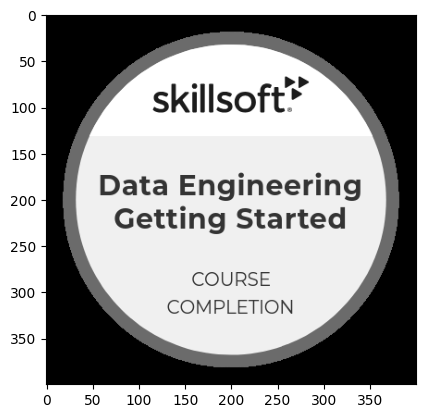

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('/content/drive/MyDrive/Classroom/Data engineering and knowledge representation MSc AIML/1aad848b-3adc-4bcd-96f4-a0492d93d5c9.png',0)
plt.imshow(img,"gray")

### Image in frequency domain

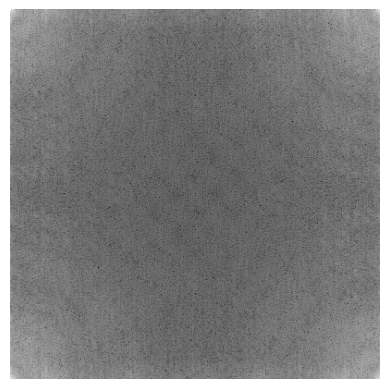

In [8]:
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

### Shifiting low frequency component to centere of the image

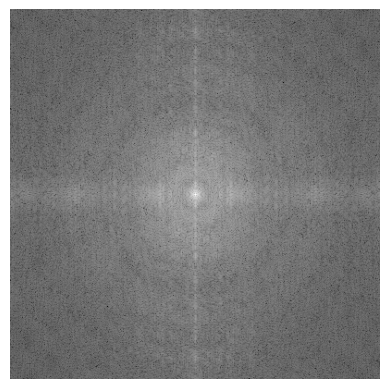

In [9]:
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),'gray')
plt.axis('off')
plt.show()

### Low pass filter

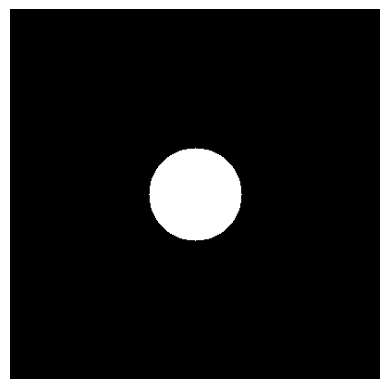

In [10]:
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50

for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
plt.imshow(H,'gray')
plt.axis('off')
plt.show()

### Ideal Low pass filter

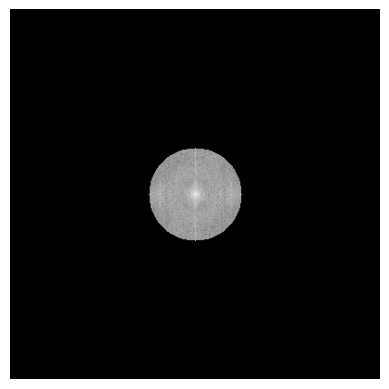

In [11]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),'gray')
plt.axis('off')
plt.show()

### Inverse the shifted Fourier Transform

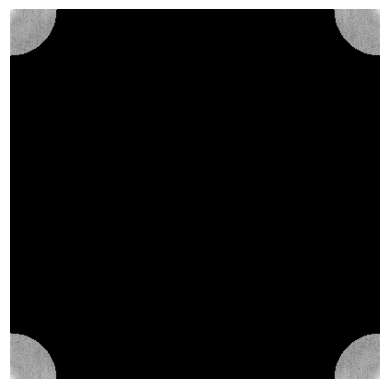

In [12]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),'gray')
plt.axis('off')
plt.show()

### Inverse the fourier transformation

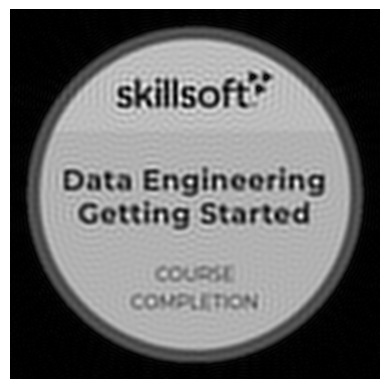

In [13]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,'gray')
plt.axis('off')
plt.show()

### High pass filter

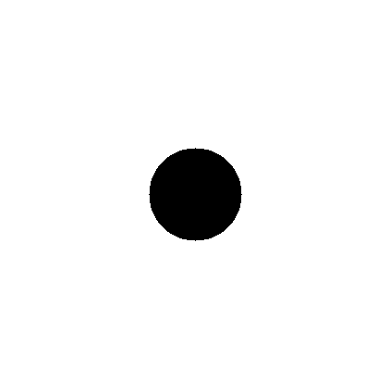

In [14]:
H = 1 - H
plt.imshow(H,'gray')
plt.axis('off')
plt.show()

### Ideal High Pass Filtering

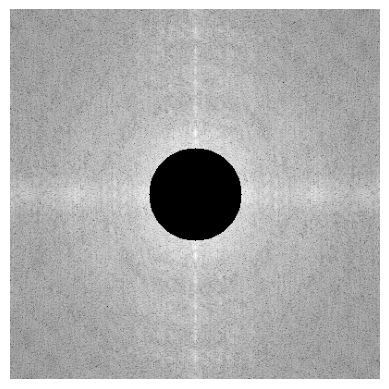

In [15]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),'gray')
plt.axis('off')
plt.show()

### Inverse the shifted Fourier Transform

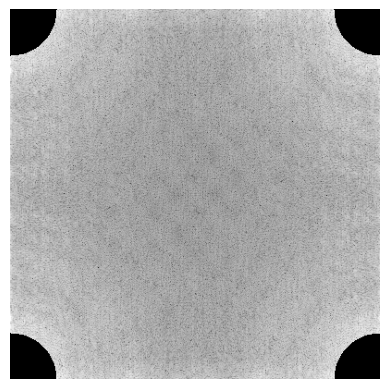

In [16]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),'gray')
plt.axis('off')
plt.show()

### Inverse Fourier Transform

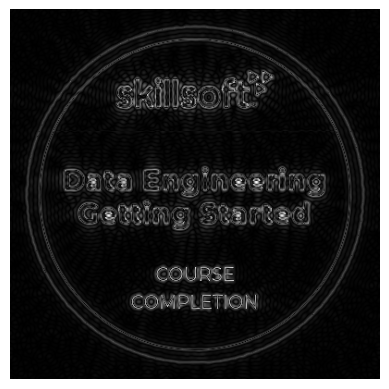

In [17]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,'gray')
plt.axis('off')
plt.show()